In [197]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [198]:
from data_merge import *

import os 
import numpy as np

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


## Find the Data Folder of the Files

In [199]:
direc_SAXS = './SAXS/'
folders_SAXS = sorted(os.listdir(direc_SAXS))
sorted(folders_SAXS)

['04680_C1-T1_A1_000_sub.dat',
 '04682_C2-T1_A2_000_sub.dat',
 '04684_C3-T1_A3_000_sub.dat',
 '04686_C5-T1_A5_000_sub.dat',
 '04688_C6-T1_A6_000_sub.dat',
 '04690_C7-T1_A7_000_sub.dat',
 '04692_C8-T1_A8_000_sub.dat',
 '04694_C9-T1_B1_000_sub.dat',
 '04696_C10-T1_B2_000_sub.dat',
 '04698_C11-T1_B3_000_sub.dat',
 '04700_C12-T1_B4_000_sub.dat',
 '04702_D1-T1_B5_000_sub.dat',
 '04704_D2-T1_B6_000_sub.dat',
 '04706_D3-T1_B7_000_sub.dat',
 '04708_D4-T1_B8_000_sub.dat',
 '04710_D5-T1_C1_000_sub.dat',
 '04712_D6-T1_C2_000_sub.dat',
 '04714_D7-T1_C3_000_sub.dat',
 '04716_D8-T1_C4_000_sub.dat',
 '04718_D9-T1_C5_000_sub.dat',
 '04720_D10-T1_C6_000_sub.dat',
 '04722_D11-T1_C7_000_sub.dat',
 '04724_D12-T1_C8_000_sub.dat',
 '04726_E1-T1_D1_000_sub.dat',
 '04728_E3-T1_D3_000_sub.dat',
 '04730_E4-T1_D4_000_sub.dat']

In [200]:
direc_MAXS = './MAXS/'
folders_MAXS = sorted(os.listdir(direc_MAXS))
folders_MAXS

['04681_C1-T1_A1_000_sub.dat',
 '04683_C2-T1_A2_000_sub.dat',
 '04685_C3-T1_A3_000_sub.dat',
 '04687_C5-T1_A5_000_sub.dat',
 '04689_C6-T1_A6_000_sub.dat',
 '04691_C7-T1_A7_000_sub.dat',
 '04693_C8-T1_A8_000_sub.dat',
 '04695_C9-T1_B1_000_sub.dat',
 '04697_C10-T1_B2_000_sub.dat',
 '04699_C11-T1_B3_000_sub.dat',
 '04701_C12-T1_B4_000_sub.dat',
 '04703_D1-T1_B5_000_sub.dat',
 '04705_D2-T1_B6_000_sub.dat',
 '04707_D3-T1_B7_000_sub.dat',
 '04709_D4-T1_B8_000_sub.dat',
 '04711_D5-T1_C1_000_sub.dat',
 '04713_D6-T1_C2_000_sub.dat',
 '04715_D7-T1_C3_000_sub.dat',
 '04717_D8-T1_C4_000_sub.dat',
 '04719_D9-T1_C5_000_sub.dat',
 '04721_D10-T1_C6_000_sub.dat',
 '04723_D11-T1_C7_000_sub.dat',
 '04725_D12-T1_C8_000_sub.dat',
 '04727_E1-T1_D1_000_sub.dat',
 '04729_E3-T1_D3_000_sub.dat',
 '04731_E4-T1_D4_000_sub.dat']

## Create Function to Read Files

In [201]:
def read_DAT_file(name):
    with open(name) as pdbfile:
        q = []
        I = []
        dI = []
        start = 10000
        for i,line in enumerate(pdbfile):
            if 'q(A-1)' in line:
                start = i
            if i > start: 
                splitted_line = [line[0:20], line[23:50], line[50:]]
                q.append(splitted_line[0])
                I.append(splitted_line[1])
                dI.append(splitted_line[2])
        q = np.array([float(i) for i in q])
        I = np.array([float(i) for i in I])
        dI = np.array([float(i) for i in dI])
        data = np.hstack((q.reshape(-1,1), I.reshape(-1,1), dI.reshape(-1,1)))
    return data

## Merge Data

Raw data shapes :  (846, 3) (881, 3)
Merged data shape :  (263, 3)


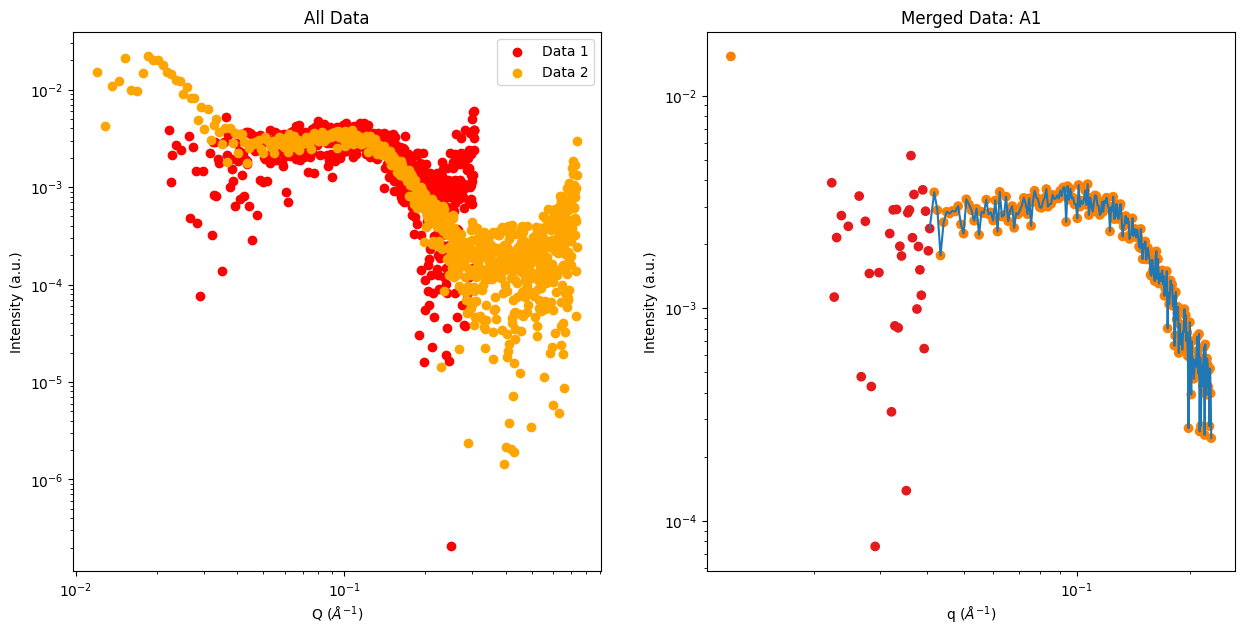

In [202]:
import re 

def custom_merger(i, cut_locations, limits):
    SAXS = read_DAT_file(direc_SAXS + folders_SAXS[i])
    MAXS = read_DAT_file(direc_MAXS + folders_MAXS[i])
    print("Raw data shapes : ", SAXS.shape, MAXS.shape)
    match = re.search(r'_([A-Z]\d+)_', direc_SAXS + folders_SAXS[i])
    well_name = match.group(1)
    
    data = perform_merge(Data_1 = SAXS, 
                        Data_2 = MAXS, 
                        cut_locations = cut_locations, 
                        idir = [],
                        save = False
                    )
    print("Merged data shape : ", data.shape)
    lower = limits[0]
    upper = -(data.shape[0] - limits[1])
    plt.loglog(data[lower:upper,0], data[lower:upper,1])
    plt.ylabel('Intensity (a.u.)')
    plt.xlabel('q ($\AA^{-1}$)')
    plt.title('Merged Data: ' + well_name)
    plt.show()

    return well_name, data[lower:upper,0],  data[lower:upper,1]

i = 0
well_name, q, Iq = custom_merger(i, [70, 830], [35, 720])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (900, 3) (891, 3)
Merged data shape :  (288, 3)


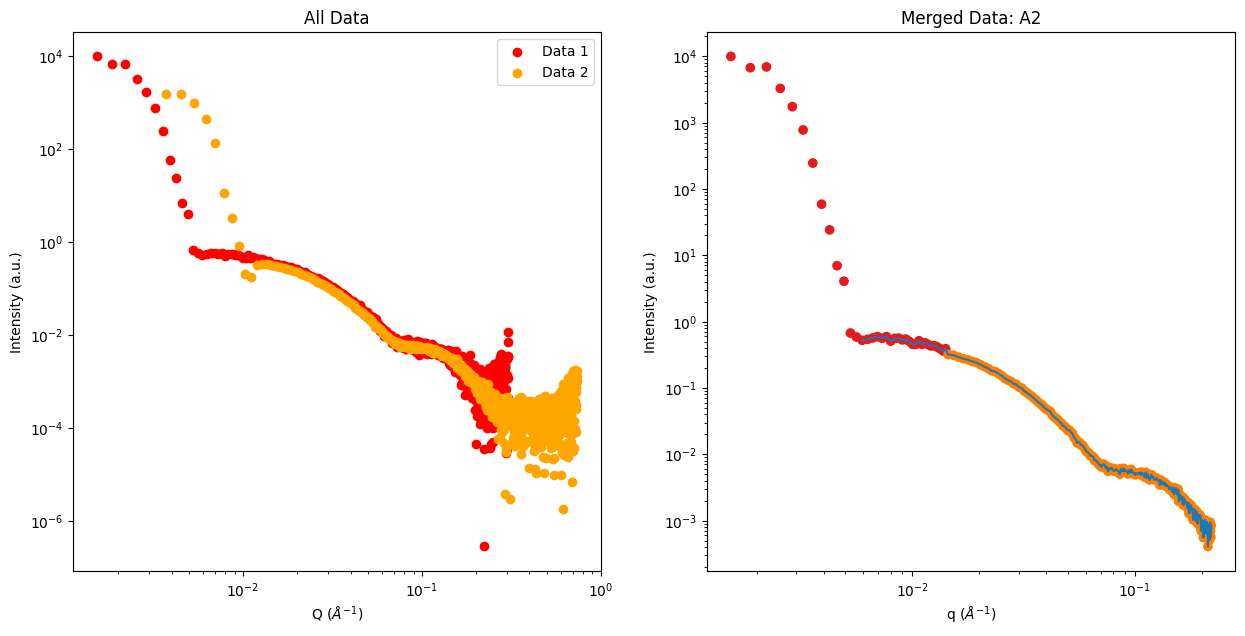

In [230]:
i = 1
well_name, q, Iq = custom_merger(i, [50, 900], [13, 720])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (900, 3) (881, 3)
Merged data shape :  (300, 3)


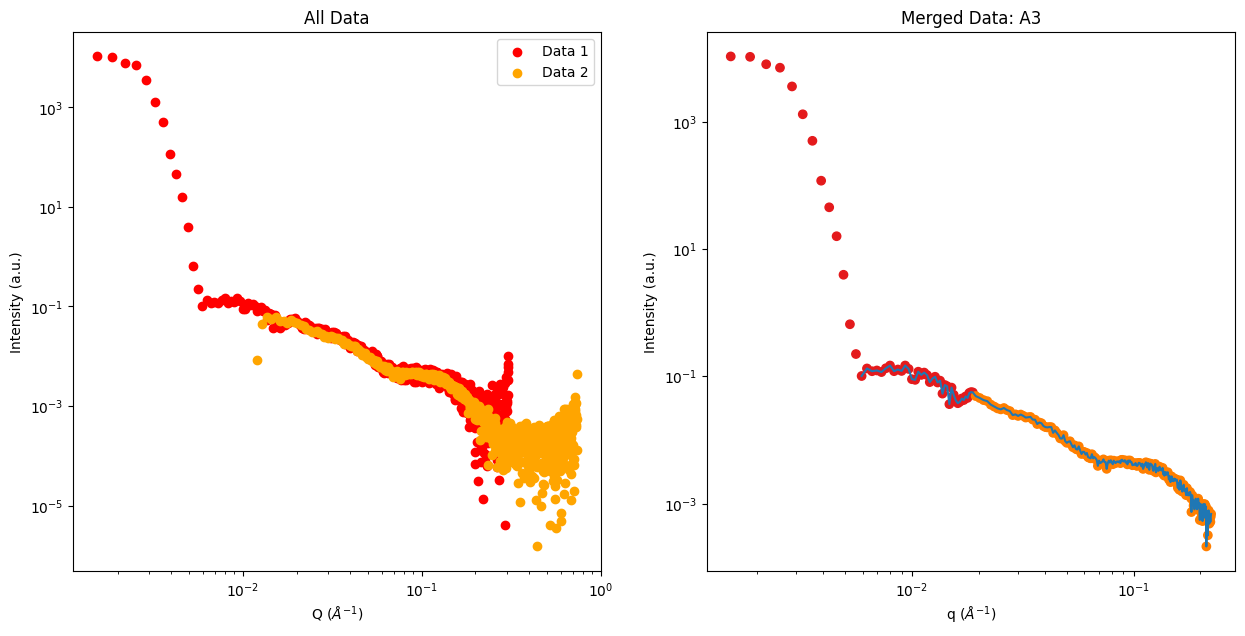

In [204]:
i = 2
well_name, q, Iq = custom_merger(i, [60, 900], [13, 720])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (846, 3) (872, 3)
Merged data shape :  (286, 3)


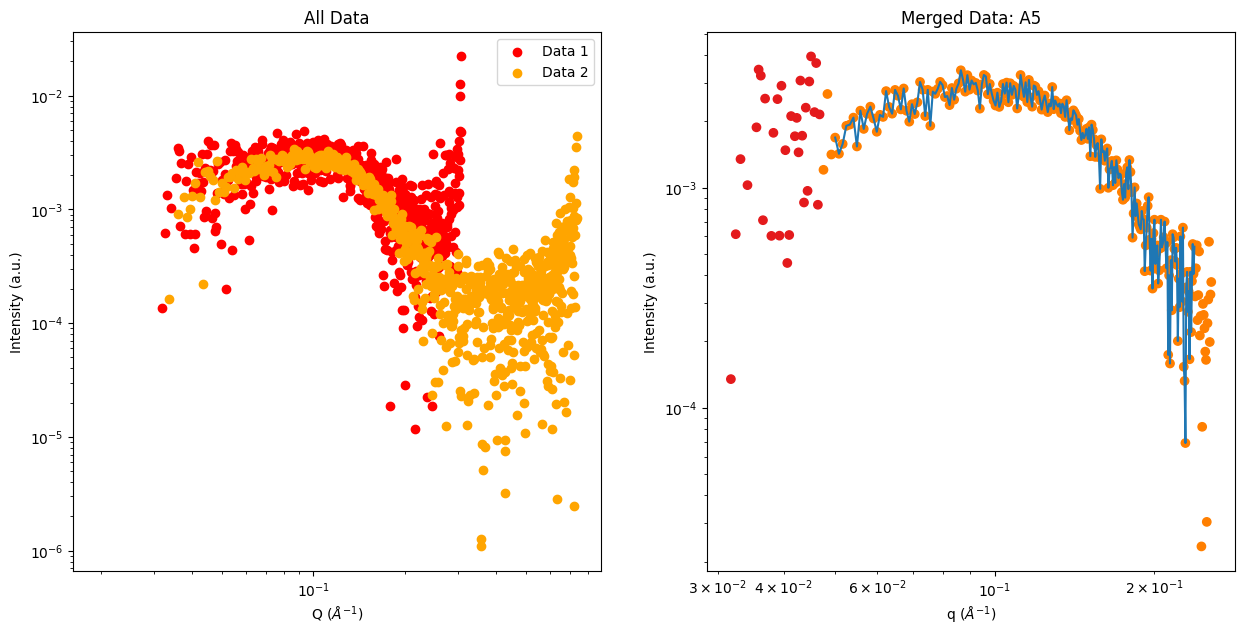

In [205]:
i = 3
well_name, q, Iq = custom_merger(i, [45, 872], [35, 550])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (846, 3) (872, 3)
Merged data shape :  (291, 3)


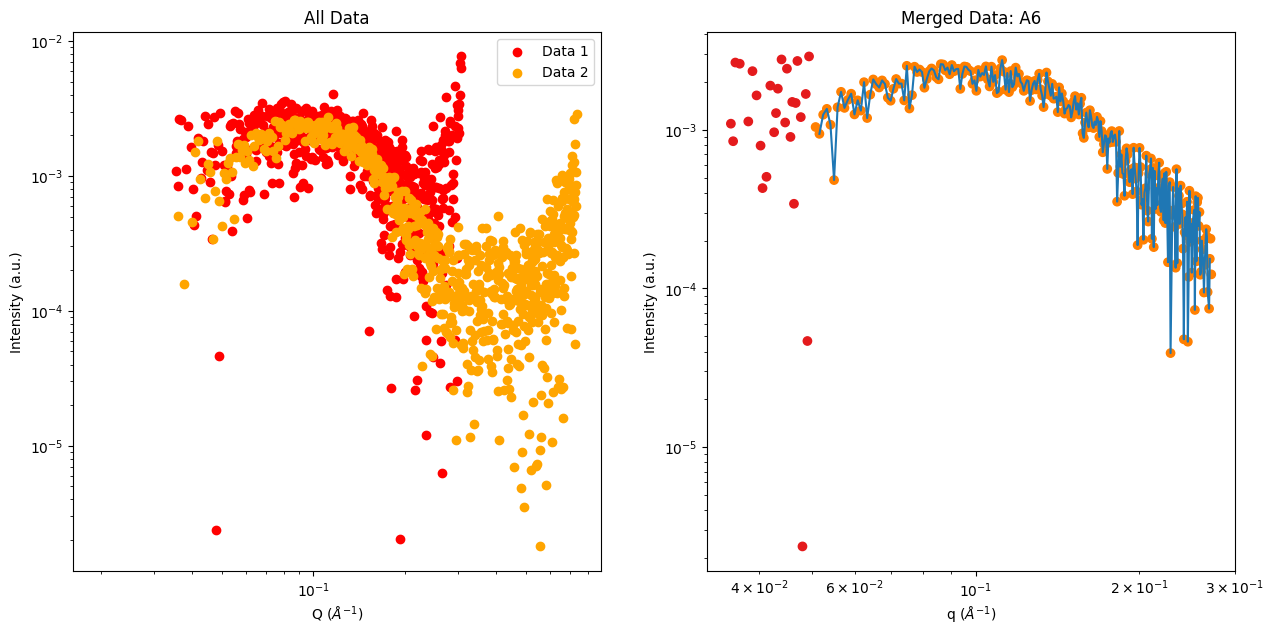

In [206]:
i = 4
well_name, q, Iq = custom_merger(i, [40, 872], [28, 580])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (846, 3) (872, 3)
Merged data shape :  (285, 3)


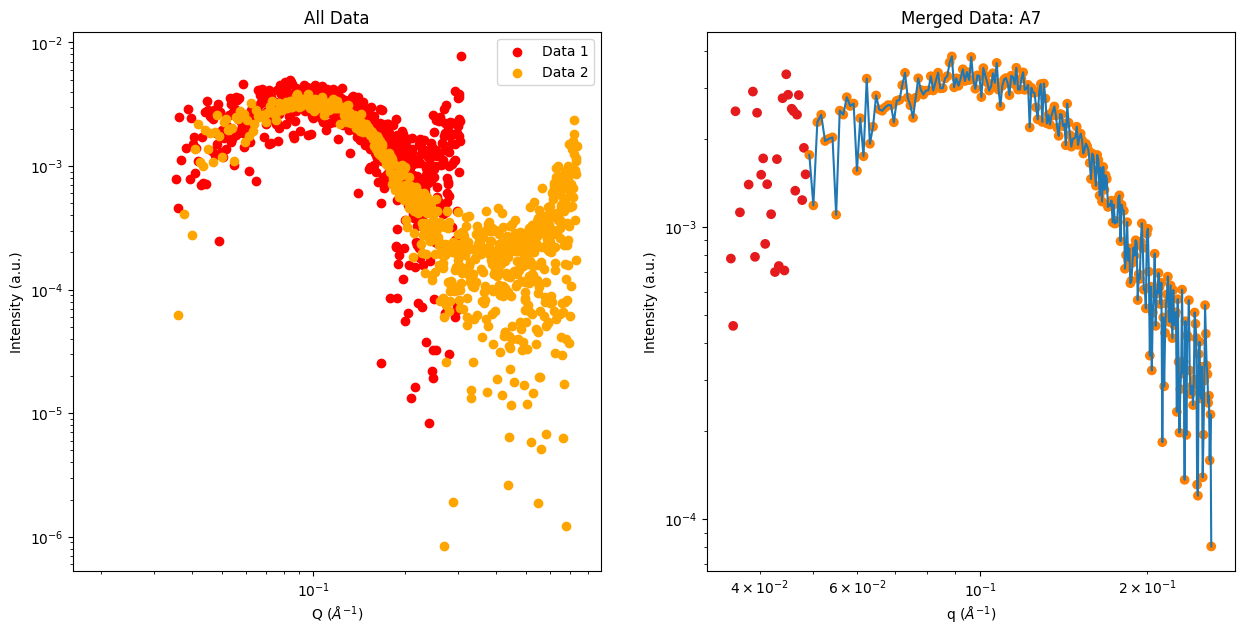

In [207]:
i = 5
well_name, q, Iq = custom_merger(i, [40, 872], [28, 580])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (901, 3) (881, 3)
Merged data shape :  (287, 3)


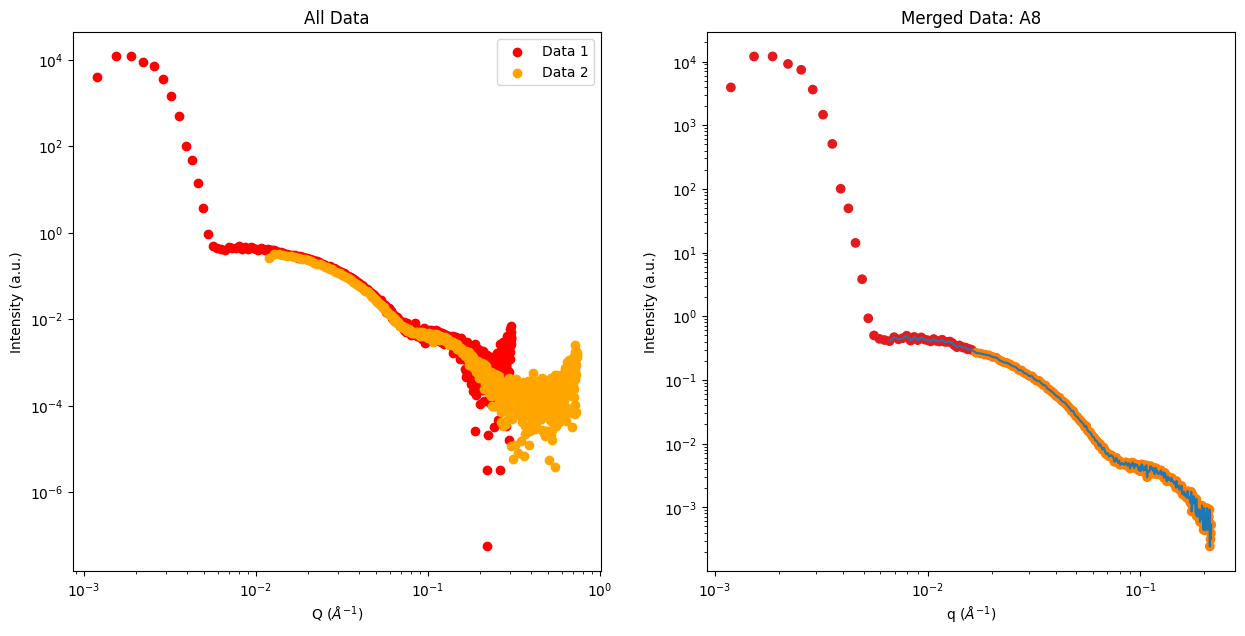

In [208]:
i = 6
well_name, q, Iq = custom_merger(i, [50, 872], [16, 580])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (900, 3) (884, 3)
Merged data shape :  (285, 3)


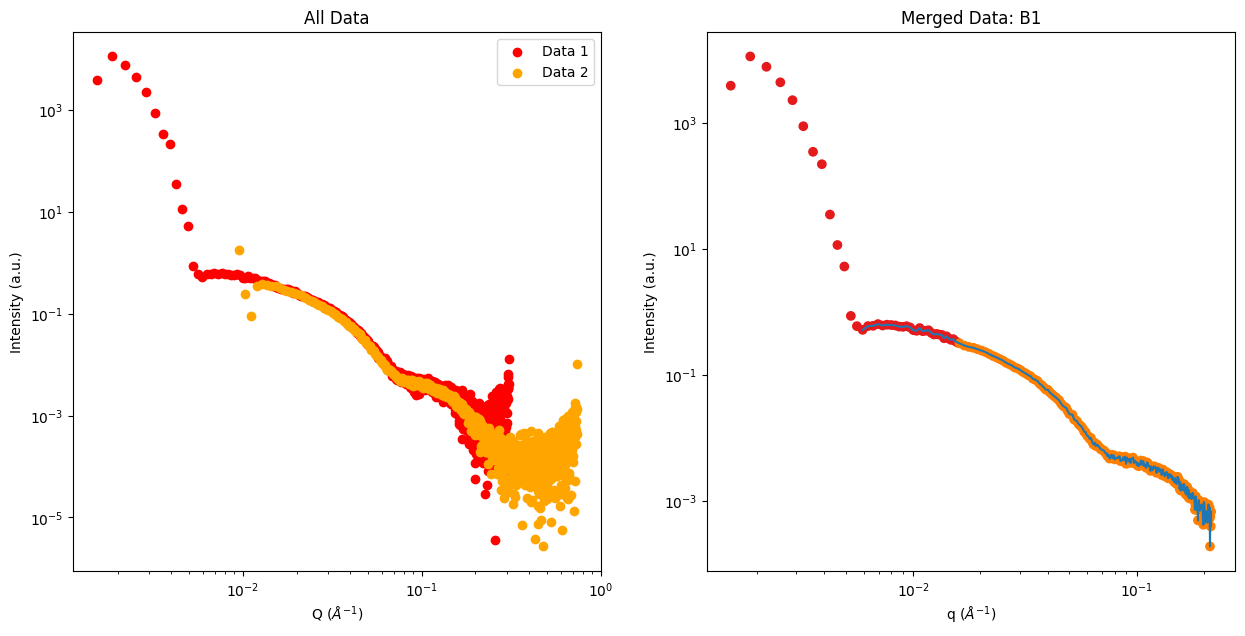

In [209]:
i = 7
well_name, q, Iq = custom_merger(i, [50, 872], [13, 580])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (846, 3) (872, 3)
Merged data shape :  (295, 3)


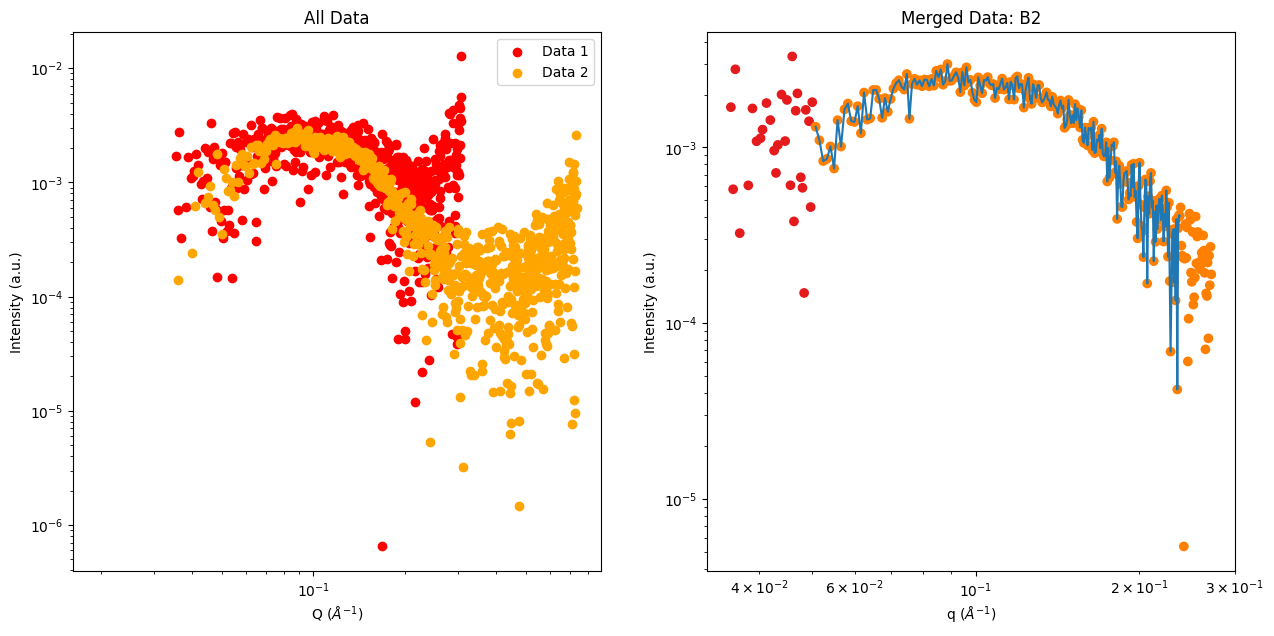

In [210]:
i = 8
well_name, q, Iq = custom_merger(i, [40, 872], [29, 550])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (901, 3) (881, 3)
Merged data shape :  (284, 3)


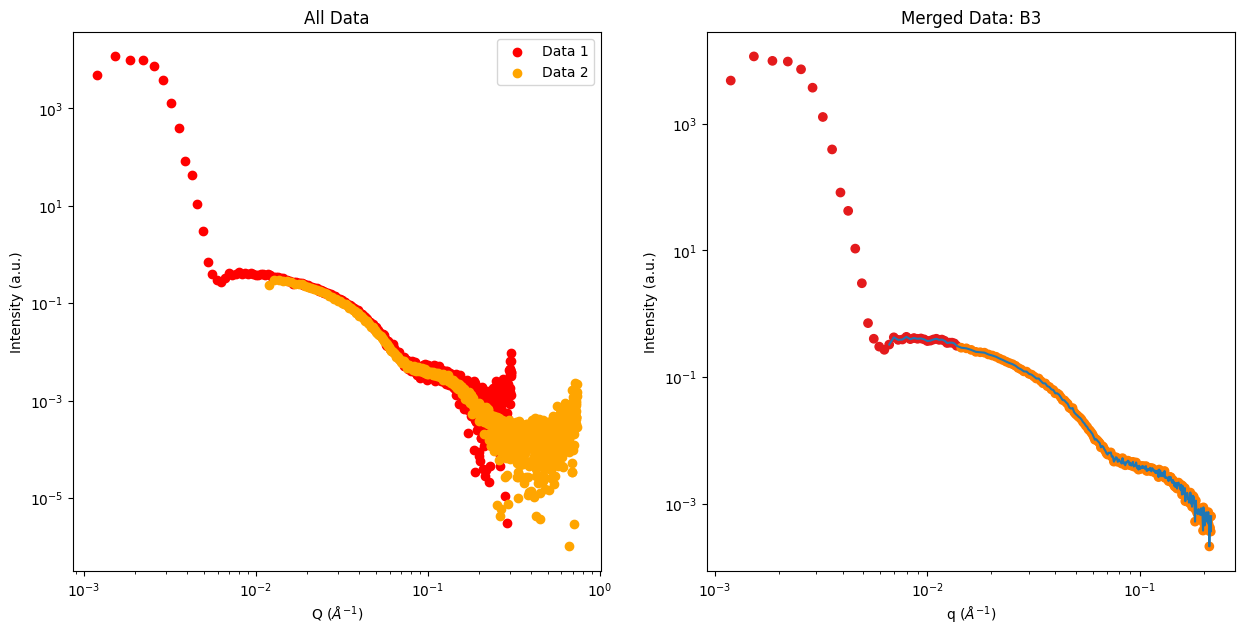

In [211]:
i = 9
well_name, q, Iq = custom_merger(i, [40, 872], [16, 580])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (900, 3) (891, 3)
Merged data shape :  (284, 3)


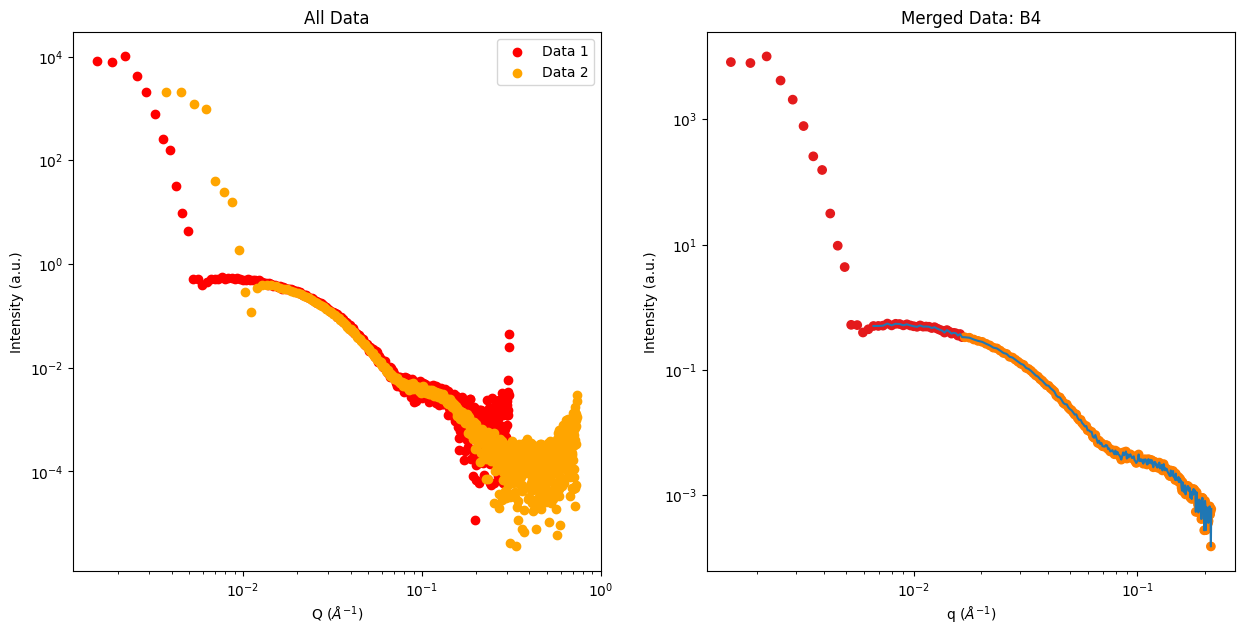

In [212]:
i = 10
well_name, q, Iq = custom_merger(i, [60, 872], [15, 580])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (900, 3) (891, 3)
Merged data shape :  (284, 3)


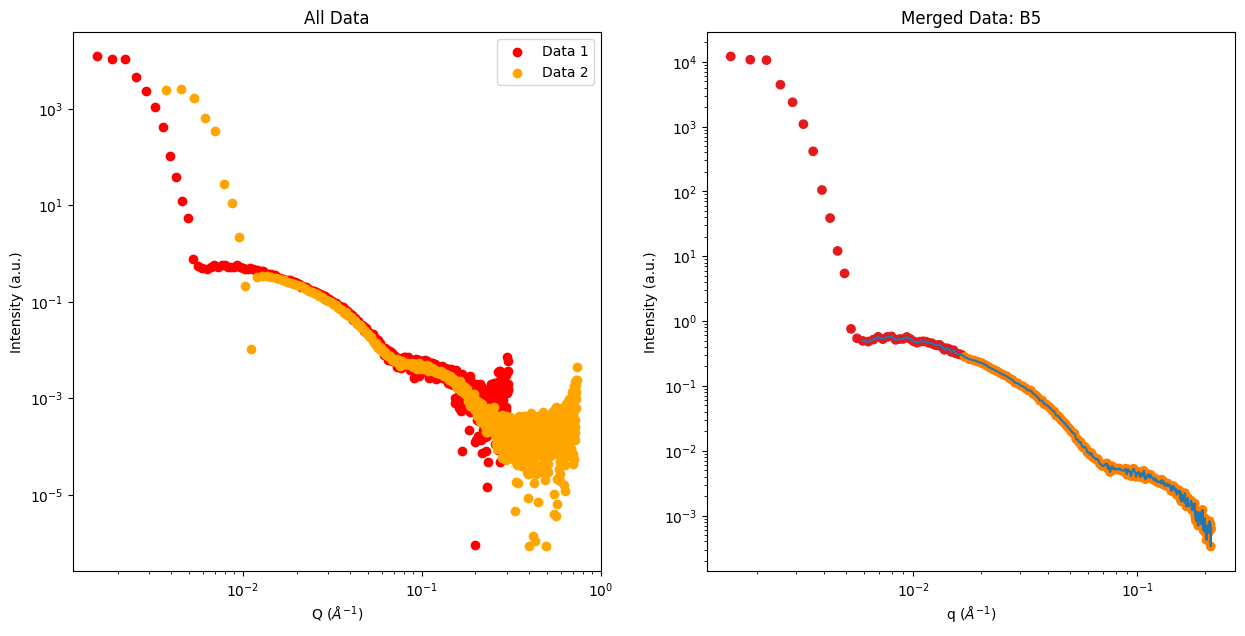

In [213]:
i = 11
well_name, q, Iq = custom_merger(i, [60, 872], [13, 580])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (846, 3) (872, 3)
Merged data shape :  (291, 3)


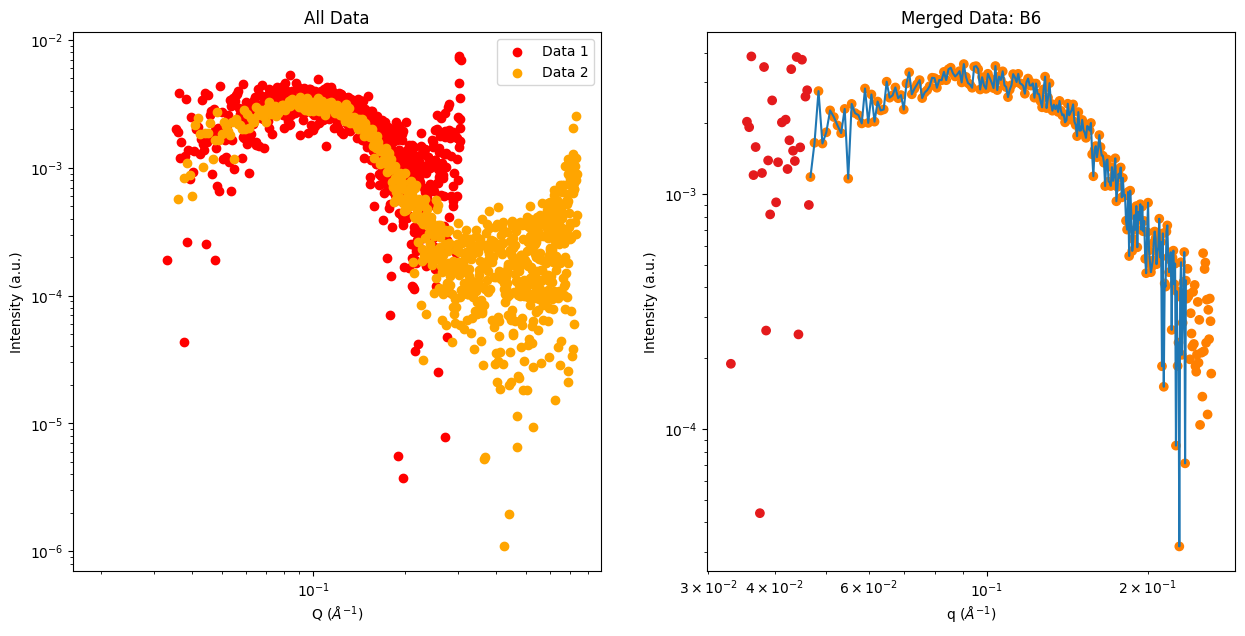

In [214]:
i = 12
well_name, q, Iq = custom_merger(i, [40, 872], [29, 550])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (900, 3) (884, 3)
Merged data shape :  (285, 3)


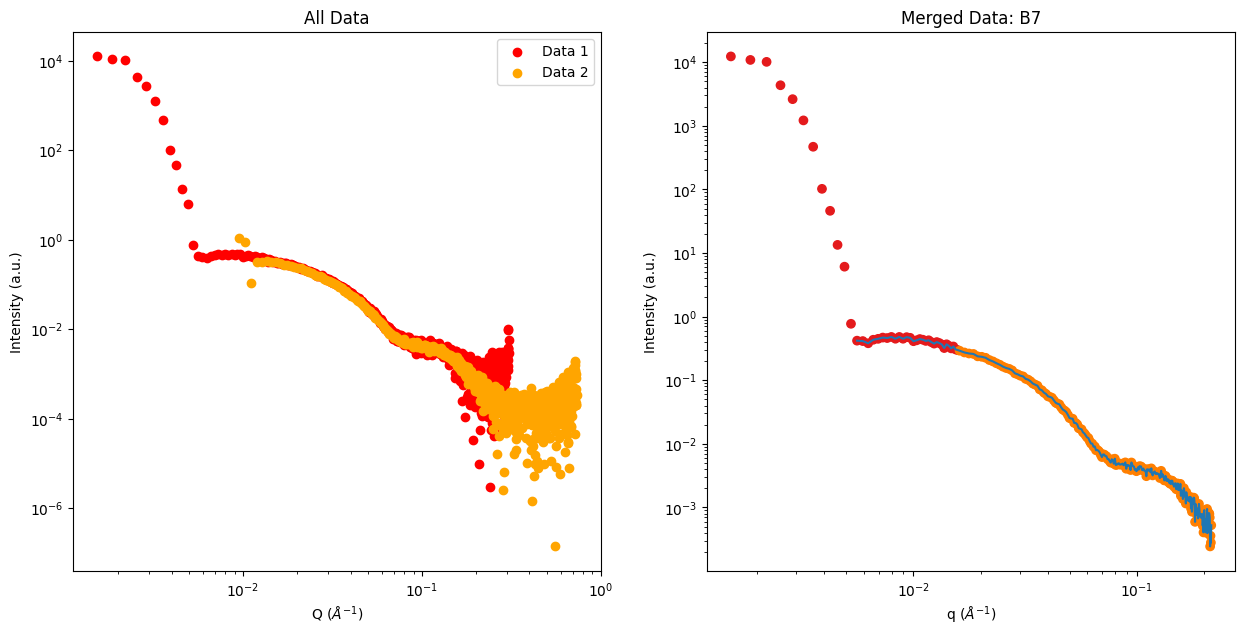

In [215]:
i = 13
well_name, q, Iq = custom_merger(i, [50, 872], [12, 570])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (846, 3) (872, 3)
Merged data shape :  (288, 3)


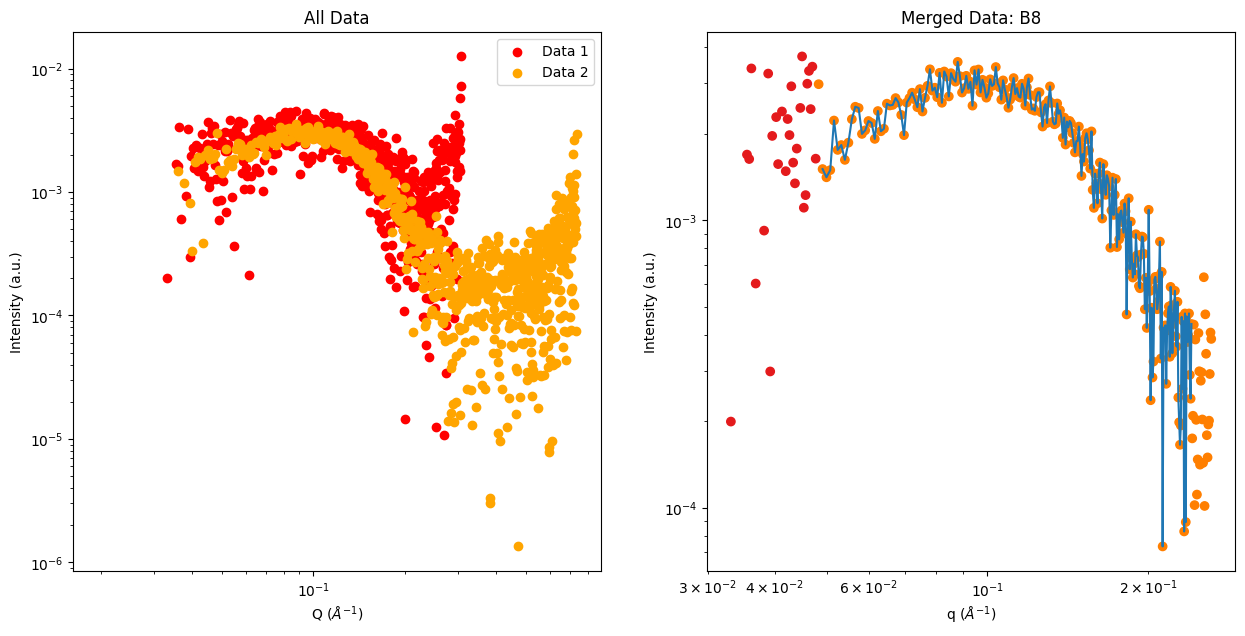

In [216]:
i = 14
well_name, q, Iq = custom_merger(i, [40, 872], [29, 550])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (900, 3) (891, 3)
Merged data shape :  (279, 3)


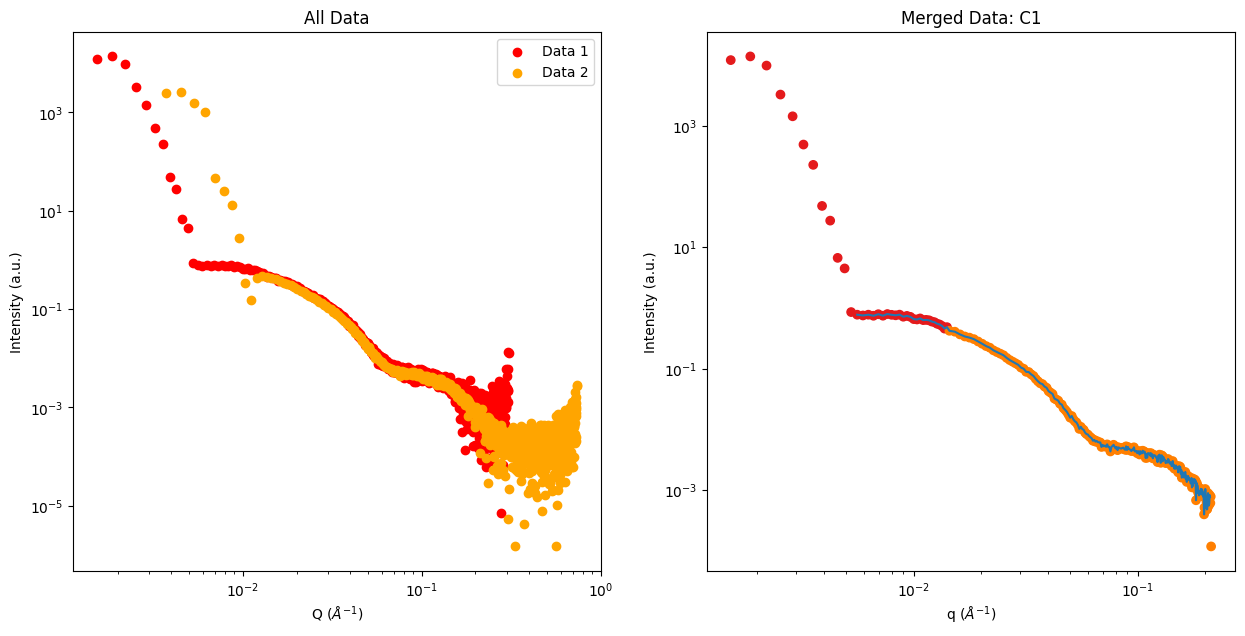

In [217]:
i = 15
well_name, q, Iq = custom_merger(i, [50, 872], [12, 555])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (846, 3) (872, 3)
Merged data shape :  (281, 3)


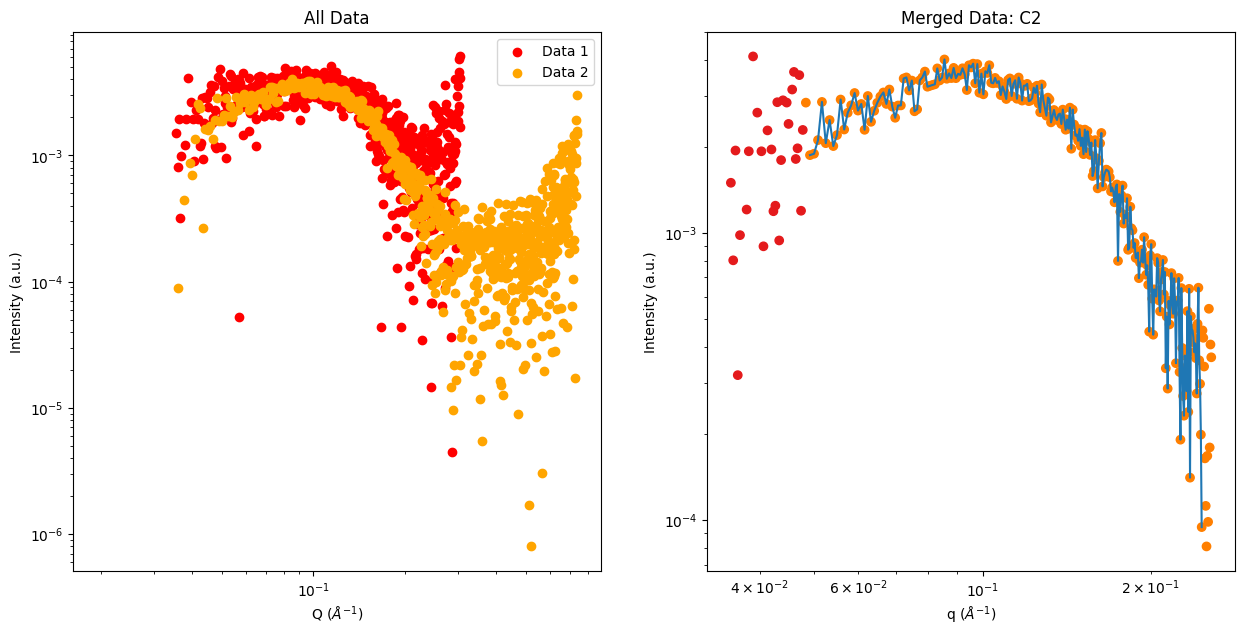

In [218]:
i = 16
well_name, q, Iq = custom_merger(i, [40, 872], [29, 550])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (846, 3) (872, 3)
Merged data shape :  (289, 3)


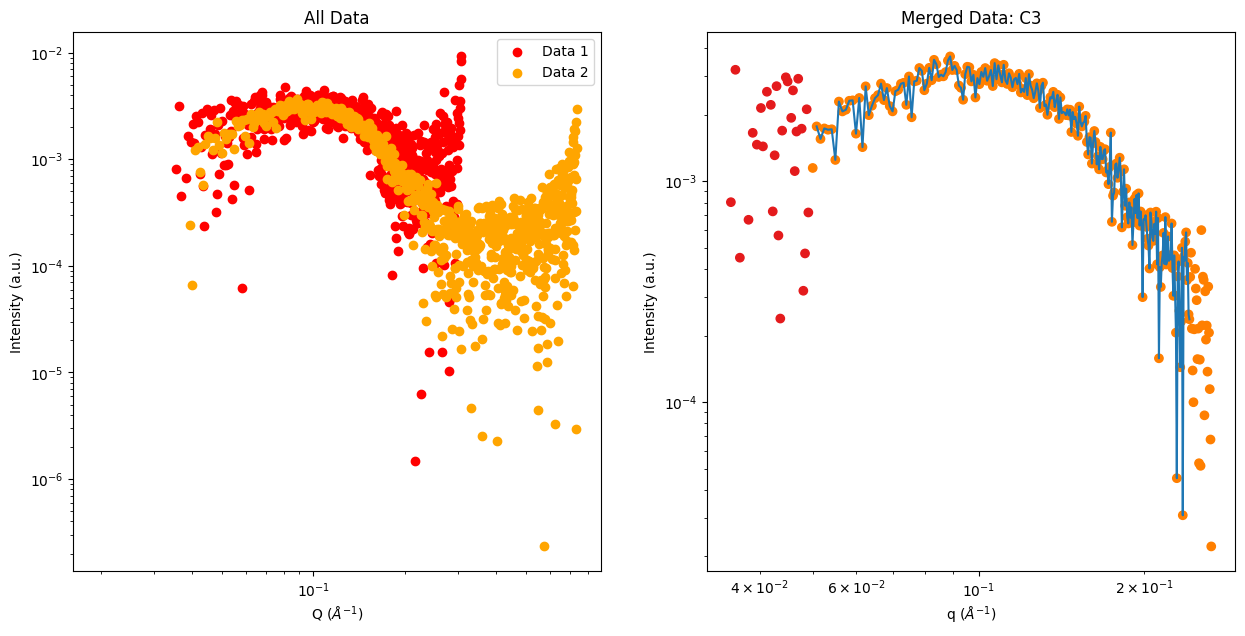

In [219]:
i = 17
well_name, q, Iq = custom_merger(i, [40, 872], [29, 550])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (846, 3) (872, 3)
Merged data shape :  (283, 3)


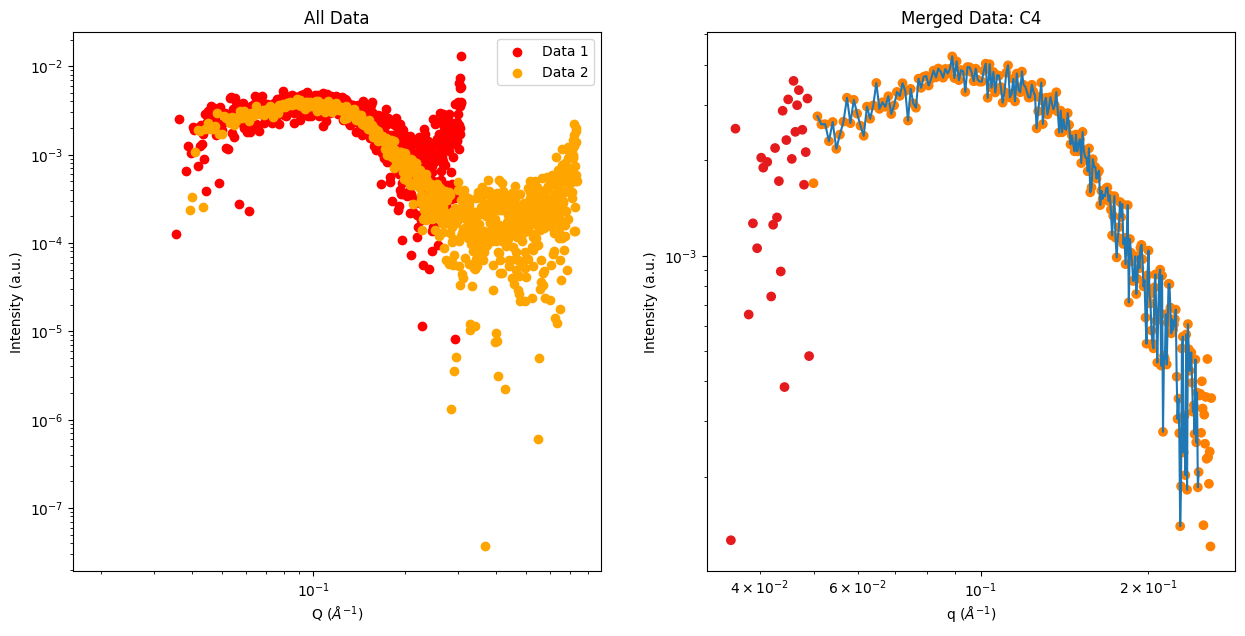

In [220]:
i = 18
well_name, q, Iq = custom_merger(i, [40, 872], [29, 550])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (900, 3) (881, 3)
Merged data shape :  (288, 3)


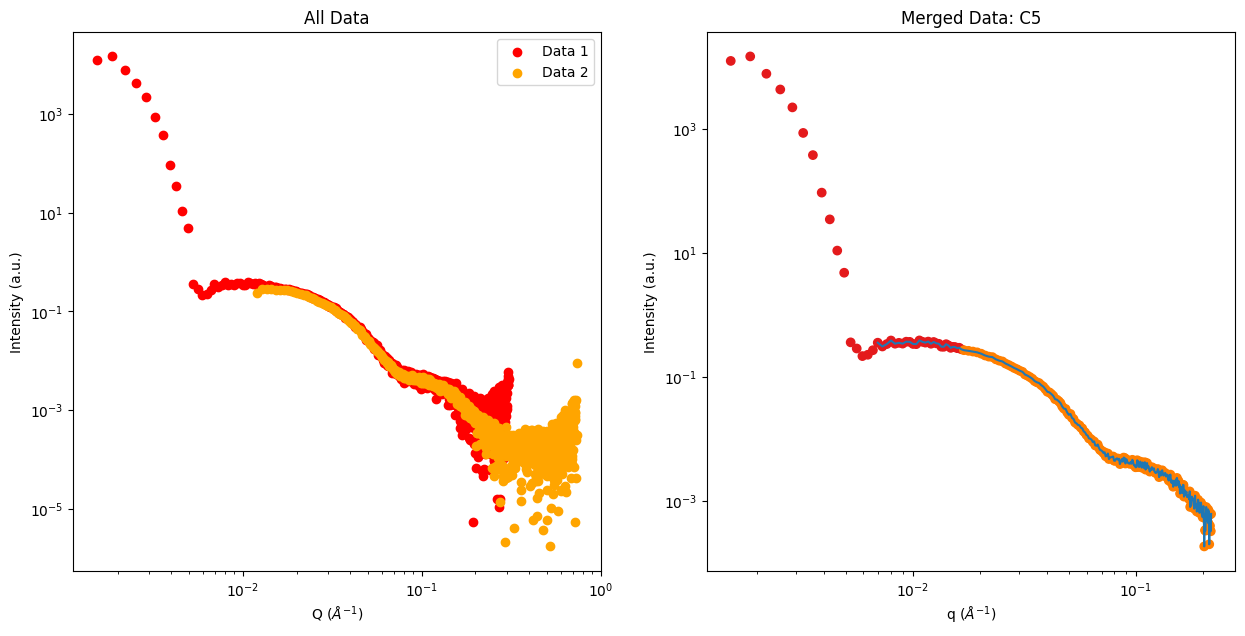

In [221]:
i = 19
well_name, q, Iq = custom_merger(i, [50, 872], [16, 580])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (846, 3) (872, 3)
Merged data shape :  (288, 3)


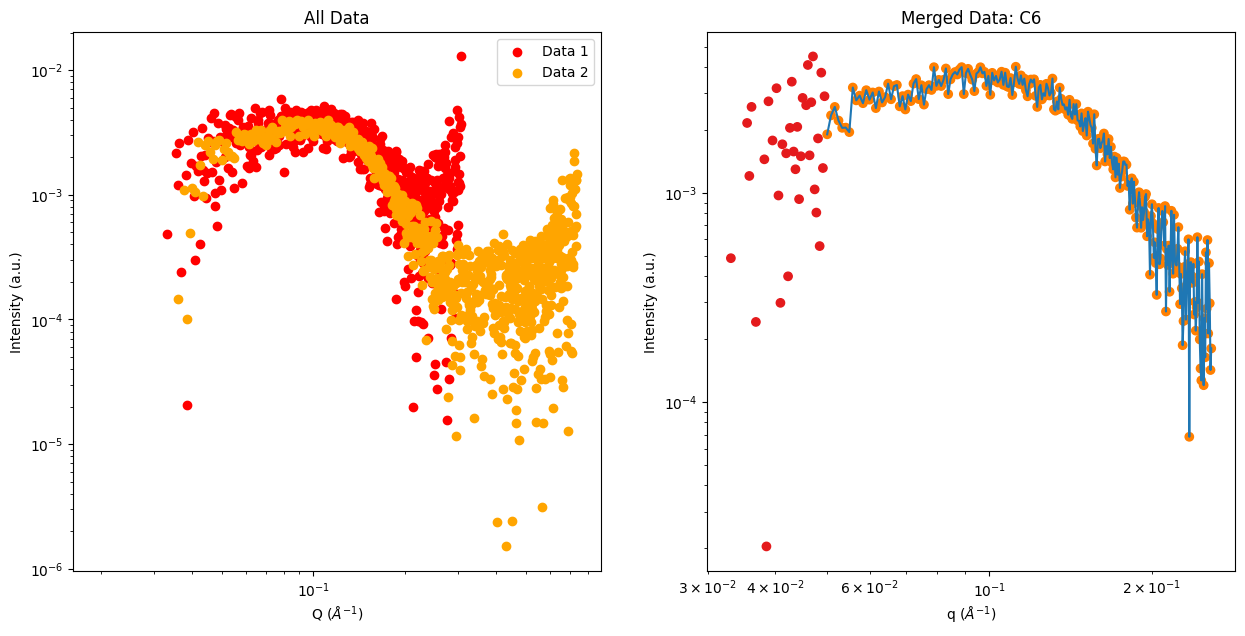

In [222]:
i = 20
well_name, q, Iq = custom_merger(i, [50, 872], [35, 580])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (900, 3) (881, 3)
Merged data shape :  (288, 3)


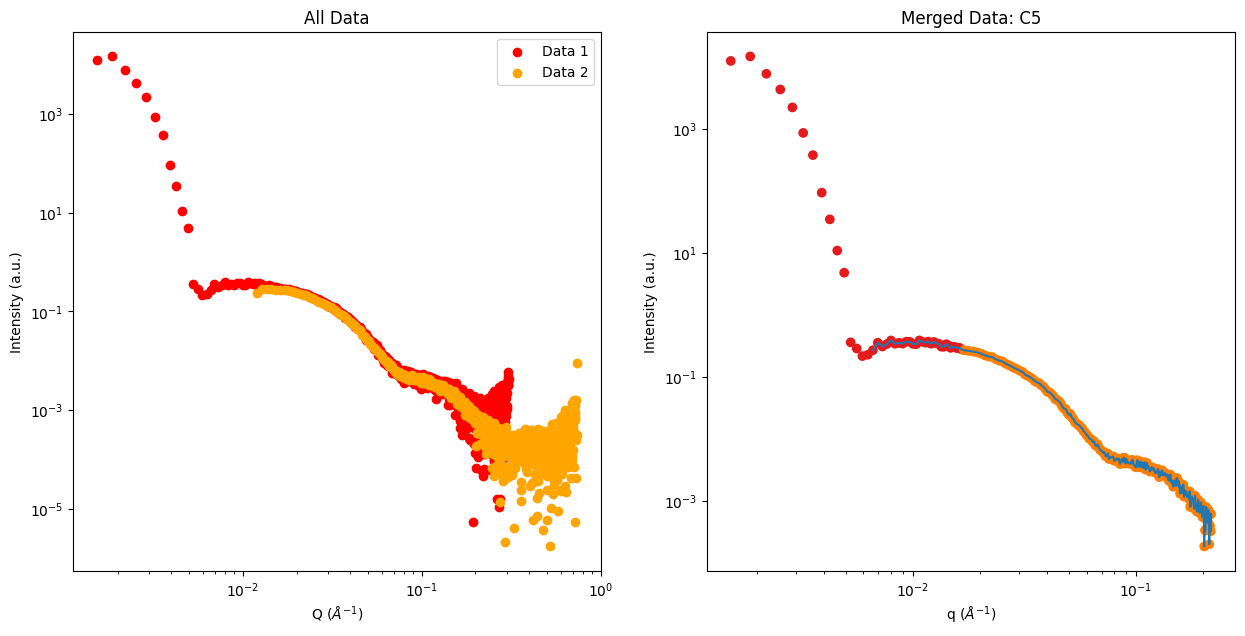

In [223]:
i = 19
well_name, q, Iq = custom_merger(i, [50, 872], [15, 580])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (846, 3) (872, 3)
Merged data shape :  (288, 3)


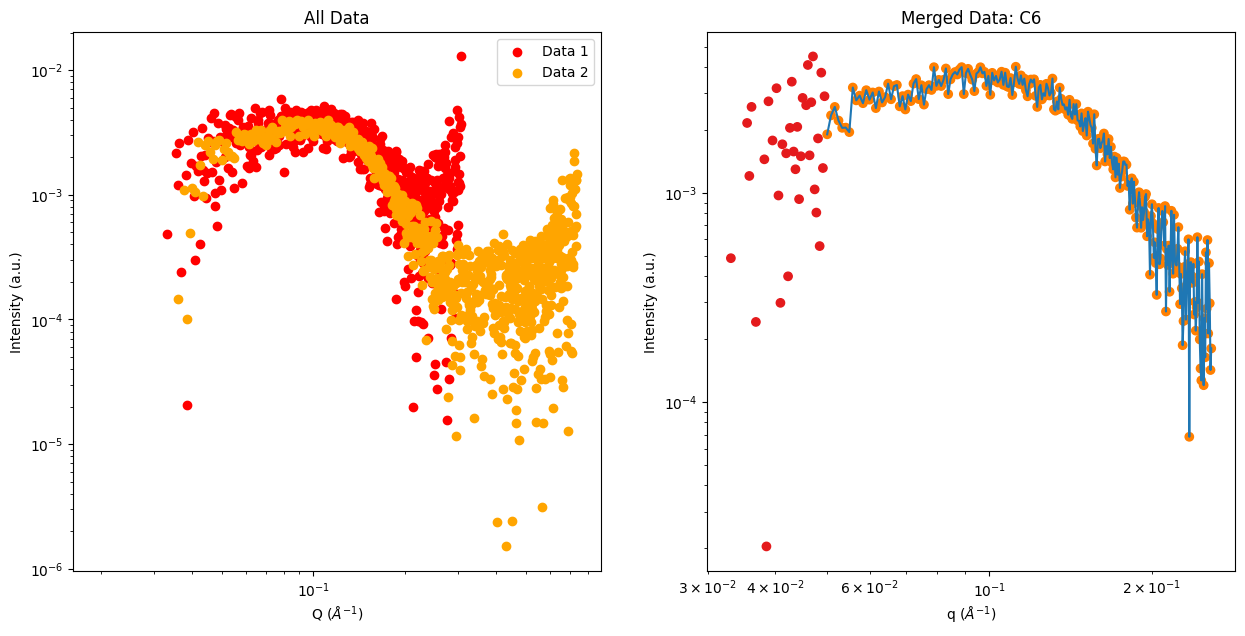

In [224]:
i = 20
well_name, q, Iq = custom_merger(i, [50, 872], [35, 580])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (846, 3) (872, 3)
Merged data shape :  (292, 3)


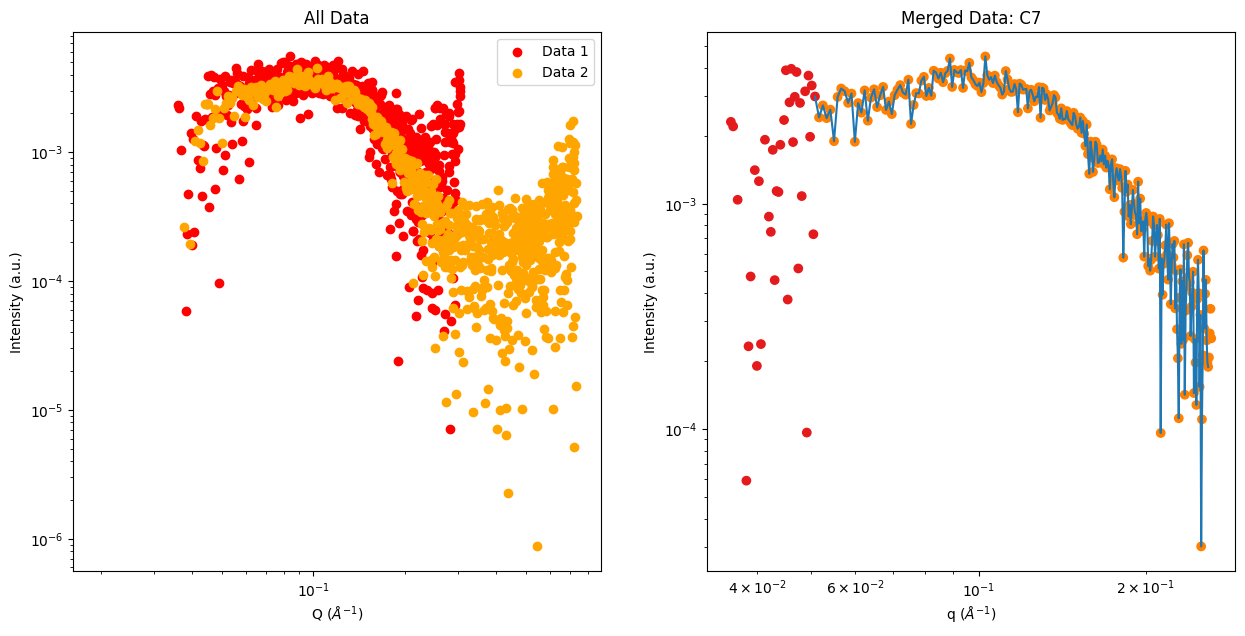

In [225]:
i = 21
well_name, q, Iq = custom_merger(i, [50, 872], [35, 580])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (846, 3) (872, 3)
Merged data shape :  (289, 3)


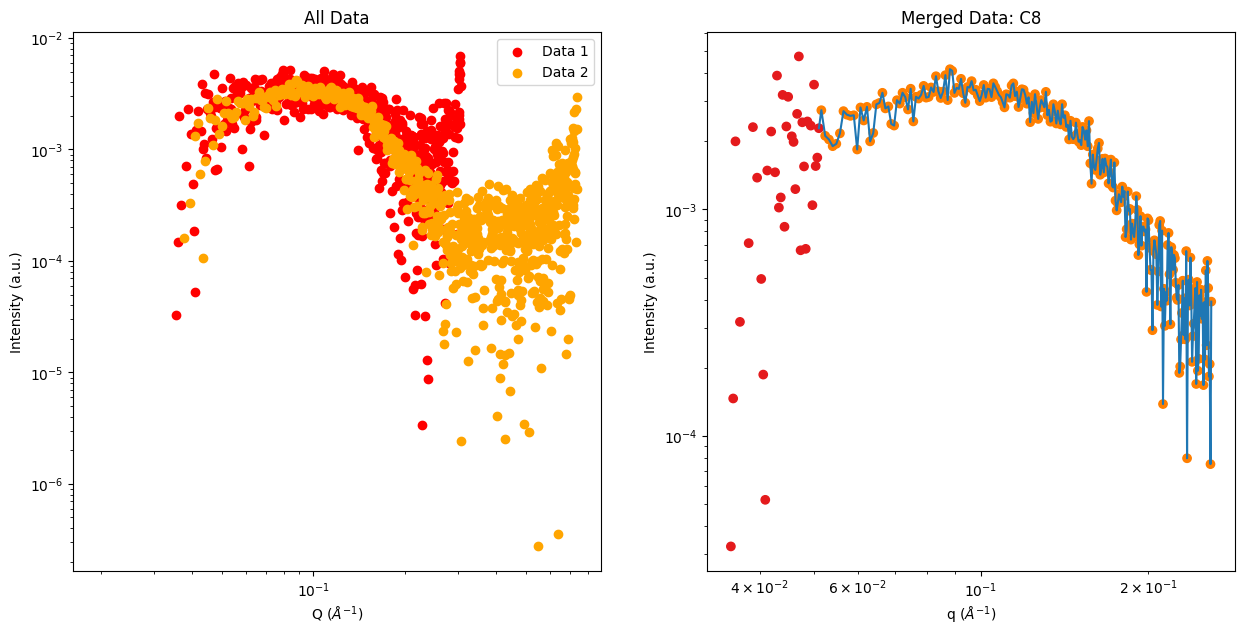

In [226]:
i = 22
well_name, q, Iq = custom_merger(i, [50, 872], [35, 580])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (900, 3) (884, 3)
Merged data shape :  (289, 3)


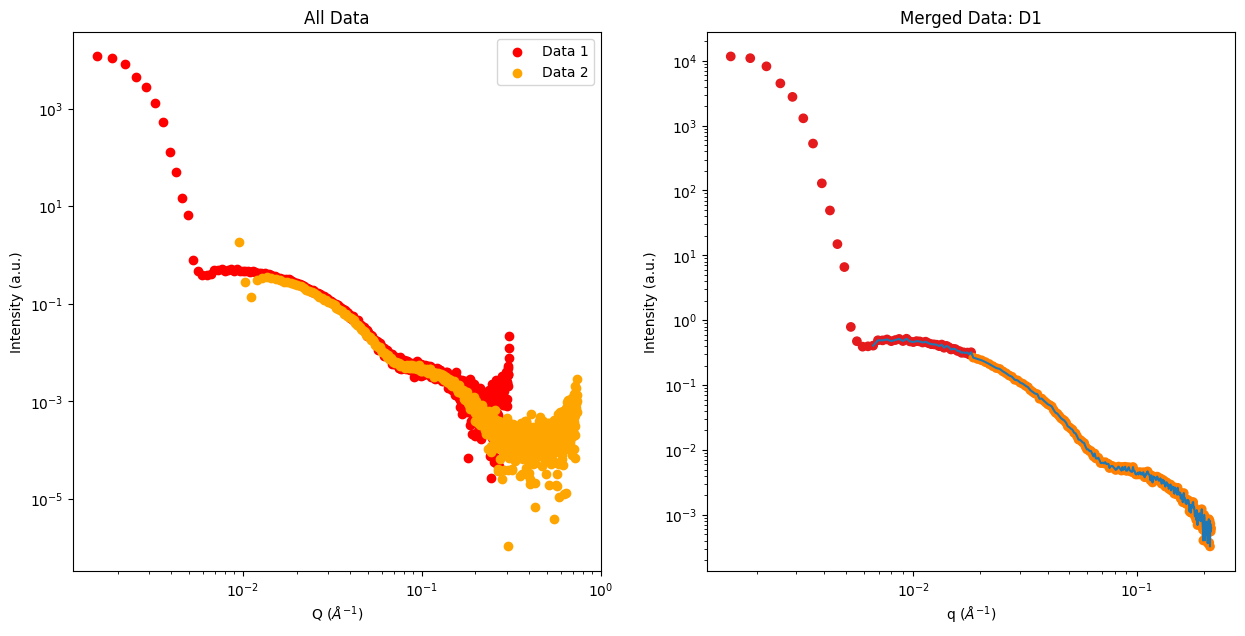

In [227]:
i = 23
well_name, q, Iq = custom_merger(i, [60, 872], [15, 580])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

Raw data shapes :  (900, 3) (891, 3)
Merged data shape :  (284, 3)


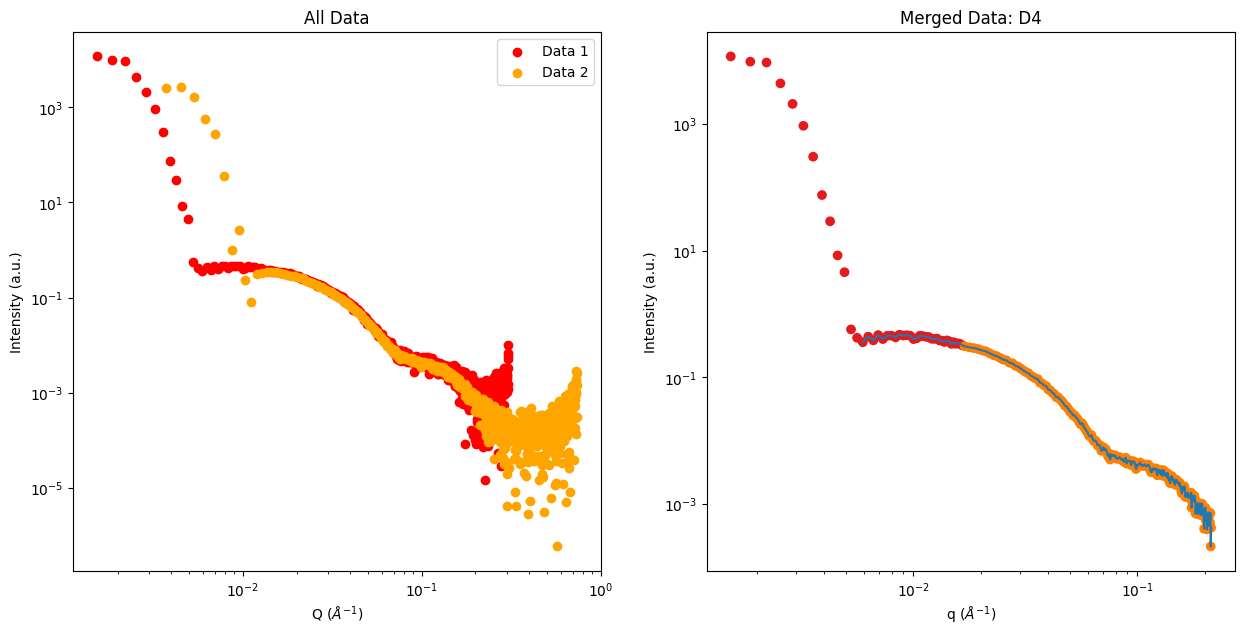

In [228]:
i = 25
well_name, q, Iq = custom_merger(i, [60, 872], [13, 580])
np.savez("./merged_data/%s.npz"%(well_name), q = q, Iq = Iq)

In [6]:
import glob, re
files = glob.glob("./merged_data/*.npz")
print(files[0])
match = re.search(r'([A-Z]\d+)', files[0])
match.group(1)

./merged_data/C8.npz


'C8'